<a href="https://colab.research.google.com/github/Panperception/PhD_D-Pruning/blob/main/CurvePlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional AE

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import re



2023-03-07 22:32:51.433820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Preprocessing

In [ ]:
import cv2
from tqdm import tqdm
import re
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image
SIZE = 256

image_path = 'CUHK Dataset/CUHK_training_cropped_photos'
img_array = []

sketch_path = 'CUHK Dataset/CUHK_training_cropped_sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

image_test_path = 'CUHK Dataset/CUHK_testing_cropped_photos'
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
img_test_array = []

for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0

    #appending normal normal image
    img_array.append(img_to_array(image))
    # Image Augmentation

    # horizontal flip
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))


for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))

    #Image Augmentation
    # horizontal flip
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

train_sketch = sketch_array
train_image = img_array

for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0

    #appending normal normal image
    img_test_array.append(img_to_array(image))
    # Image Augmentation

test_image = img_test_array

sketch_test_path = 'CUHK Dataset/CUHK_testing_cropped_sketches'
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))
sketch_test_array = []

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0

    #appending normal normal image
    sketch_test_array.append(img_to_array(image))
    # Image Augmentation

test_sketch = sketch_test_array

100%|██████████| 88/88 [00:00<00:00, 387.37it/s]


Total number of sketch images: 704
Total number of images: 704


100%|██████████| 100/100 [00:00<00:00, 1198.71it/s]


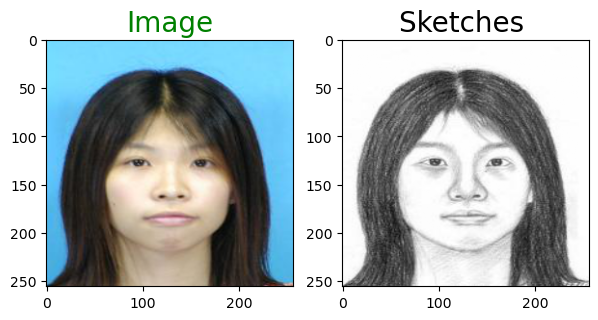

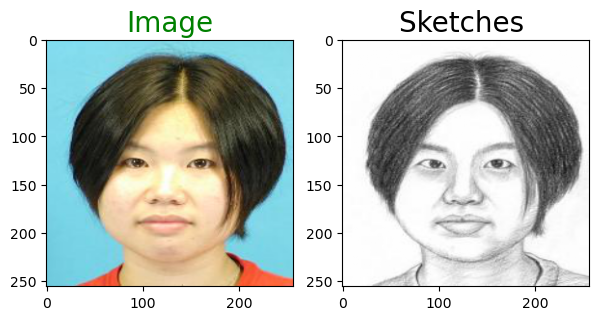

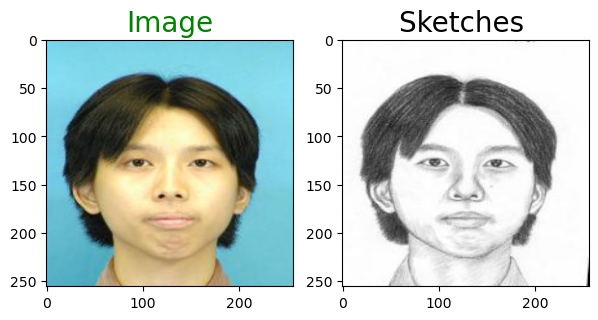

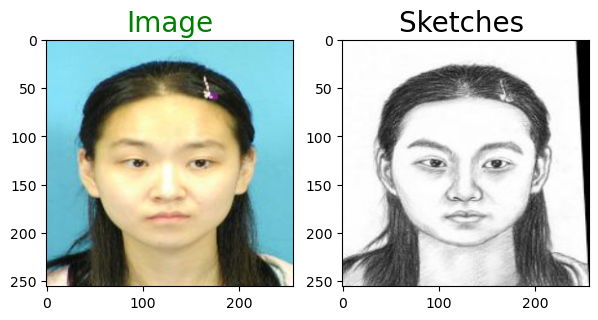

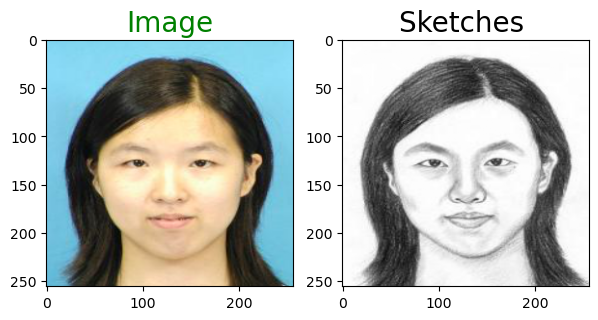

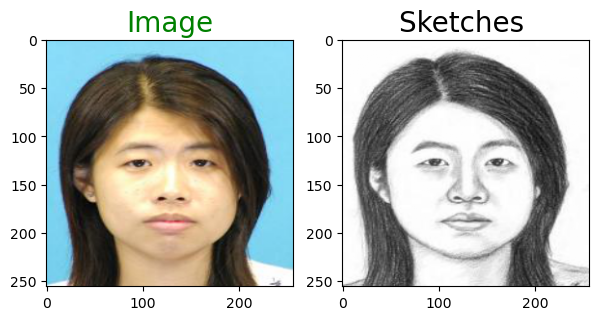

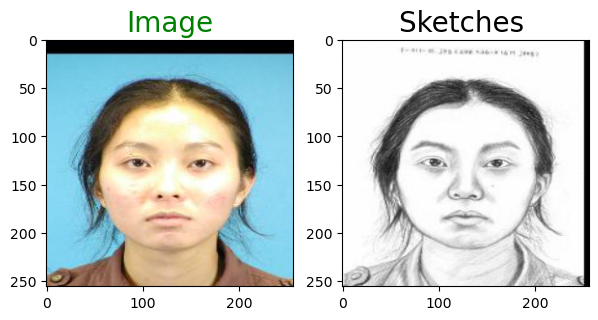

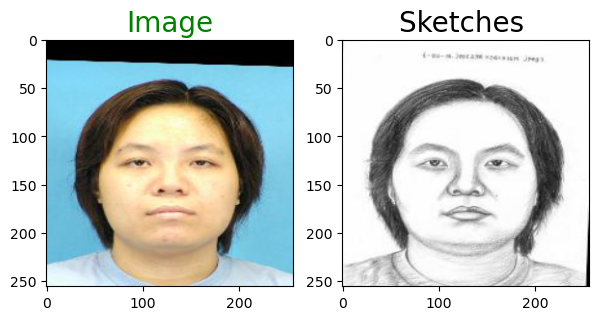

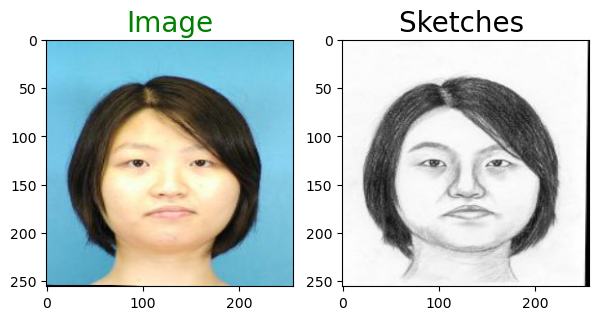

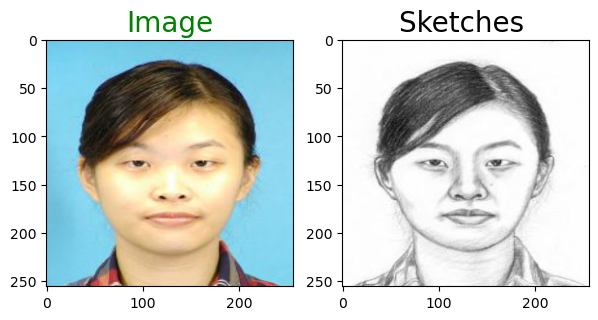

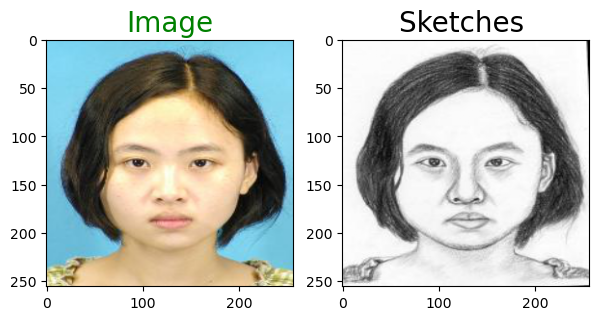

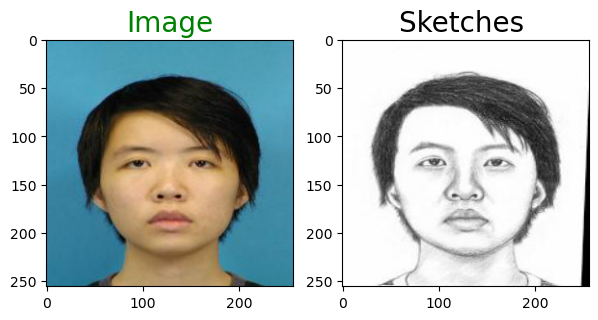

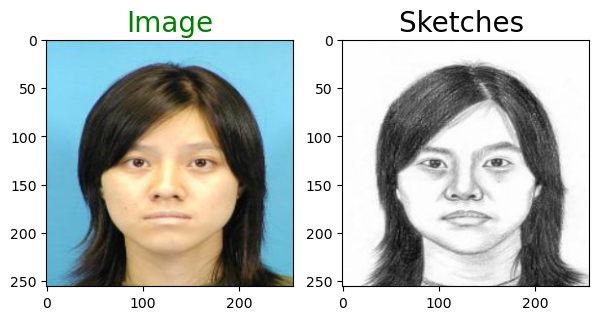

In [ ]:
# defining function to plot images pair
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)

    plt.show()

ls = [i for i in range(0,104,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])


In [ ]:

train_sketch = np.reshape(train_sketch,(len(train_sketch),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch = np.reshape(test_sketch,(len(test_sketch),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)





Train color image shape: (704, 256, 256, 3)
Test color image shape (100, 256, 256, 3)


Model

In [ ]:
def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.1))
    upsample.add(tf.keras.layers.LeakyReLU())
    return upsample

def model():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(64,4,False)(x)
    encoder_output = downsample(256,4)(x)

    decoder_input = upsample(256,4,True)(encoder_output)
    x = upsample(64,4,False)(decoder_input)
    x = upsample(16,4,True)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)


    return tf.keras.Model(encoder_input, decoder_output)

# to get summary of model
model = model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 127, 127, 16)      768       
                                                                 
 sequential_7 (Sequential)   (None, 62, 62, 64)        16384     
                                                                 
 sequential_8 (Sequential)   (None, 30, 30, 256)       263168    
                                                                 
 sequential_9 (Sequential)   (None, 62, 62, 256)       1048576   
                                                                 
 sequential_10 (Sequential)  (None, 126, 126, 64)      262144    
                                                                 
 sequential_11 (Sequential)  (None, 254, 254, 16)      1638

In [ ]:
#shows graphs
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].set_xlabel("Epochs")
    ax[1].set_xlabel("Epochs")
    ax[0].legend()
    ax[1].legend()

#https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7

Epoch 1/50
6/6 [==============================] - 57s 9s/step - loss: 0.0864 - accuracy: 0.2987 - val_loss: 0.0632 - val_accuracy: 0.3544
Epoch 2/50
6/6 [==============================] - 55s 9s/step - loss: 0.0395 - accuracy: 0.3366 - val_loss: 0.0749 - val_accuracy: 0.4346
Epoch 3/50
6/6 [==============================] - 55s 9s/step - loss: 0.0322 - accuracy: 0.3307 - val_loss: 0.1332 - val_accuracy: 0.4482
Epoch 4/50
6/6 [==============================] - 55s 9s/step - loss: 0.0294 - accuracy: 0.3019 - val_loss: 0.2764 - val_accuracy: 0.2850
Epoch 5/50
6/6 [==============================] - 55s 9s/step - loss: 0.0274 - accuracy: 0.2680 - val_loss: 0.2506 - val_accuracy: 0.2876
Epoch 6/50
6/6 [==============================] - 55s 9s/step - loss: 0.0264 - accuracy: 0.2906 - val_loss: 0.1400 - val_accuracy: 0.3871
Epoch 7/50
6/6 [==============================] - 55s 9s/step - loss: 0.0251 - accuracy: 0.3222 - val_loss: 0.0871 - val_accuracy: 0.4554
Epoch 8/50
6/6 [==================

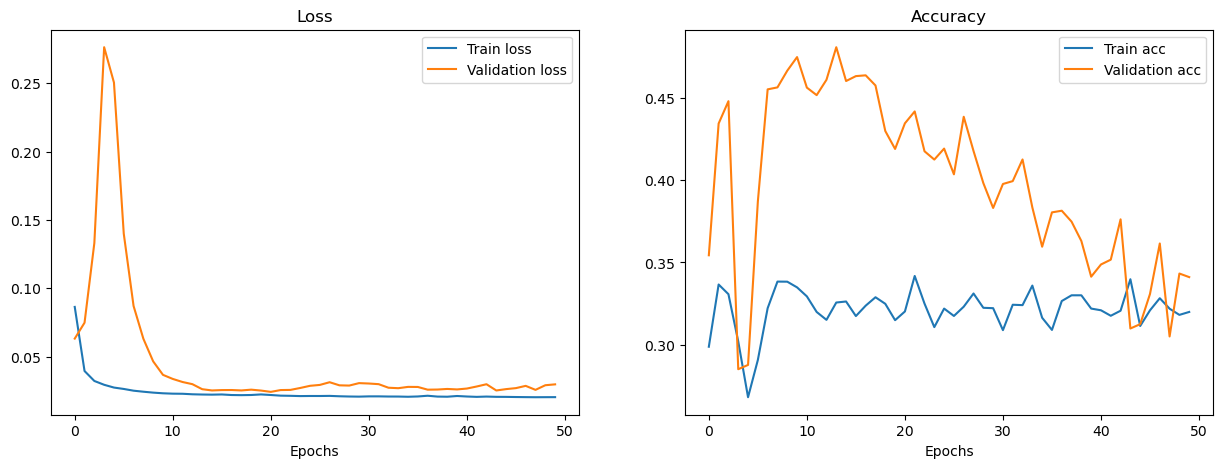

In [ ]:

#run and show history of fit
model.compile(optimizer = 'adam', loss='mse' , metrics=['accuracy'])
history = model.fit(train_image, train_sketch, verbose=1, epochs=50, validation_split=0.1, batch_size=124)



show_final_history(history)

In [ ]:
model.save('convAE_CUHK_f2s_50.model')
prediction_on_test_data = model.evaluate(test_image, test_sketch)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

INFO:tensorflow:Assets written to: convAE_CUHK_f2s_50.model/assets


INFO:tensorflow:Assets written to: convAE_CUHK_f2s_50.model/assets


4/4 [==============================] - 4s 788ms/step - loss: 0.1004 - acc: 0.2982
Loss:  0.1004161462187767
Accuracy:  29.8


In [ ]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

model = keras.models.load_model("convAE_CUHK.model",
                                    custom_objects=None,
                                    compile=True)
ls = [i for i in range(0,104,8)]
for i in ls:
    predicted =np.clip(model.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images(test_image[i],test_sketch[i],predicted)

Bigger model for sketch 2 face

In [ ]:
def models2f():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(256,4)(x)
    x = downsample(512,4)(x)

    encoder_output = downsample(1024,4)(x)

    decoder_input = upsample(1024,4,True)(encoder_output)
    x = upsample(512,4,False)(decoder_input)
    x = upsample(256,4, True)(x)
    x = upsample(64,4)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)

    return tf.keras.Model(encoder_input, decoder_output)

# to get summary of model
models2f = models2f()
models2f.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_36 (Sequential)  (None, 127, 127, 16)      768       
                                                                 
 sequential_37 (Sequential)  (None, 62, 62, 32)        8320      
                                                                 
 sequential_38 (Sequential)  (None, 30, 30, 64)        32768     
                                                                 
 sequential_39 (Sequential)  (None, 14, 14, 256)       263168    
                                                                 
 sequential_40 (Sequential)  (None, 6, 6, 512)         2099200   
                                                                 
 sequential_41 (Sequential)  (None, 2, 2, 1024)        8392

Epoch 1/20
6/6 [==============================] - 115s 19s/step - loss: 0.6103 - accuracy: 0.1776 - val_loss: 0.5802 - val_accuracy: 0.1773
Epoch 2/20
6/6 [==============================] - 114s 19s/step - loss: 0.4860 - accuracy: 0.2015 - val_loss: 0.3868 - val_accuracy: 0.1454
Epoch 3/20
6/6 [==============================] - 114s 19s/step - loss: 0.3165 - accuracy: 0.1964 - val_loss: 0.7871 - val_accuracy: 0.3000
Epoch 4/20
6/6 [==============================] - 115s 19s/step - loss: 0.2705 - accuracy: 0.3638 - val_loss: 0.5493 - val_accuracy: 0.3498
Epoch 5/20
6/6 [==============================] - 115s 19s/step - loss: 0.2255 - accuracy: 0.4421 - val_loss: 3.5995 - val_accuracy: 0.2118
Epoch 6/20
6/6 [==============================] - 114s 19s/step - loss: 0.1899 - accuracy: 0.4124 - val_loss: 2.2039 - val_accuracy: 0.2490
Epoch 7/20
6/6 [==============================] - 114s 19s/step - loss: 0.1603 - accuracy: 0.4807 - val_loss: 1.8475 - val_accuracy: 0.3110
Epoch 8/20
6/6 [====

INFO:tensorflow:Assets written to: convAE_CUHK_s2f_2.model/assets


INFO:tensorflow:Assets written to: convAE_CUHK_s2f_2.model/assets


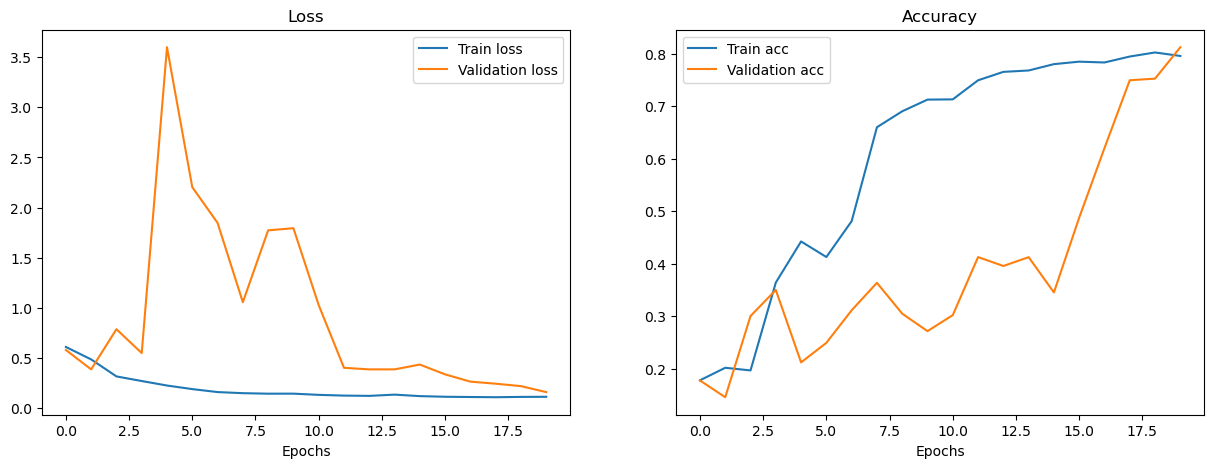

In [ ]:
models2f.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error', metrics = ['accuracy'])

history = models2f.fit(train_sketch, train_image, epochs = 20, verbose = 1, validation_split=0.1, batch_size=124)
models2f.save('convAE_CUHK_s2f_2.model')

#run and show history of fit



show_final_history(history)

In [ ]:
prediction_on_test_data = models2f.evaluate(test_sketch, test_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

ls = [i for i in range(10)]
for i in ls:
    predicted =np.clip(models2f.predict(test_sketch[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images(test_image[i],test_sketch[i],predicted)